# Use your own data and complete the following steps. Complete the assignment within a .ipynb notebook.

## Submit a .zip file containing your data and the results. Refer to demo_03-classification for examples of setting up a custom dataset.

# * Step 1. Create your own custom dataset featuring 3 custom categories of at least 100 images each


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import urllib.request

from pathlib import Path

target_path = "/tmp/flower_photos.tgz"
file_path = Path(target_path)

if file_path.exists():
    print("File exists!")
else:
    print("File does not exist.")
    dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
    urllib.request.urlretrieve(dataset_url, target_path)
    print("Dataset downloaded successfully!")

File exists!


In [3]:
import tarfile
import os

# Extract the downloaded file
with tarfile.open(target_path) as tar:
    tar.extractall(path = "/tmp")


data_dir = "/tmp/flower_photos"
print(data_dir)

total_images = 0
for root, _, files in os.walk(data_dir):
    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png')):  # Adjust for your image formats
            total_images += 1
            image_path = os.path.join(root, file)

print("Total images downloaded:", total_images)

/tmp/flower_photos
Total images downloaded: 3670


In [4]:
! rm -rf /tmp/hw3/dataset
! mkdir /tmp/hw3/dataset
! for flower in tulips sunflowers daisy; do mkdir -p /tmp/hw3/dataset/$flower ; for f in `find /tmp/flower_photos/$flower -maxdepth 1 -type f | head -100 ` ; do  cp $f /tmp/hw3/dataset/$flower;  done ; done

! ls -R /tmp/hw3/dataset/ | wc -l

     309


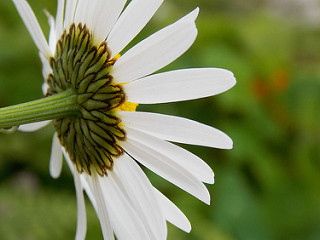

In [5]:
import pathlib
from PIL import Image

data_dir = '/tmp/hw3/dataset/'
daisy_path = pathlib.Path(data_dir) / "daisy"  # Ensure correct path using pathlib
daisy_imgs = list(daisy_path.glob('*.jpg'))  # Adjust file extension if needed

Image.open(str(daisy_imgs[0]))

# * Step 2. Split this data between 80% training and 20% test


In [6]:
batch_size = 32

In [9]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split

# Load the dataset
dataset = ImageFolder(root='/tmp/hw3/dataset/', transform=None)  # Don't apply transform at this stage

# Split dataset into training and validation sets
train_size = int(0.8 * len(dataset))  # 80% training data
val_size = len(dataset) - train_size  # Remaining data for validation
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])


In [10]:
class_names = dataset.classes
print(class_names)

['daisy', 'sunflowers', 'tulips']


In [12]:
# import torch
# import torchvision
# import matplotlib.pyplot as plt

# data_iter = iter(train_dataloader)
# images, labels = next(data_iter)

# plt.figure(figsize=(10, 8))
# for i in range(9):
#     image = images[i].permute(1, 2, 0).numpy()  # Convert tensor to numpy array
#     plt.subplot(3, 3, i + 1)
#     plt.imshow(image)
#     plt.title(f"Label: {class_names[labels[i].item()]}")
#     plt.axis("off")

# plt.show()


# * Step 3. Preprocess the data as you see fit


In [15]:
# Define transforms for preprocessing

mean = [0.485, 0.456, 0.406]  # Mean of ImageNet dataset
std = [0.229, 0.224, 0.225]   # Standard deviation of ImageNet dataset

transform = transforms.Compose([
    transforms.Resize((224, 224)),              # Resize images to a fixed size
    transforms.ToTensor(),                      # Convert PIL Image to tensor
    transforms.Normalize(mean, std)             # Normalize image tensor
])

# Apply transforms to training and validation sets
train_dataset.dataset.transform = transform
val_dataset.dataset.transform = transform

# Create DataLoader for training and validation sets
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


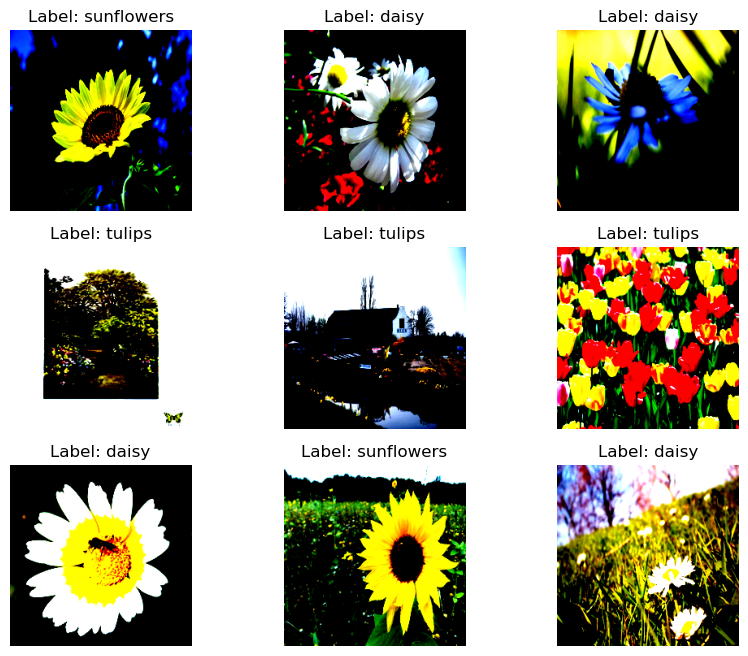

In [16]:
import torch
import torchvision
import matplotlib.pyplot as plt

data_iter = iter(train_dataloader)
images, labels = next(data_iter)

plt.figure(figsize=(10, 8))
for i in range(9):
    image = images[i].permute(1, 2, 0).numpy()  # Convert tensor to numpy array
    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(f"Label: {class_names[labels[i].item()]}")
    plt.axis("off")

plt.show()


# * Step 4. Create a Convolutional Neural Network model to learn about your training set


In [ ]:
import torch
import torch.nn as nn

class CNNModel(nn.Module):
    def __init__(self, num_classes, img_height, img_width):
        super(CNNModel, self).__init__()
        self.rescaling = nn.Sequential(
            nn.Conv2d(3, 3, kernel_size=1),
            nn.BatchNorm2d(3),
            nn.ReLU(inplace=True)
        )
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * (img_height // 8) * (img_width // 8), 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.rescaling(x)
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = self.flatten(x)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [31]:
import torch.optim as optim
import torch.nn.functional as F

# def evaluate(model, test_loader):
#     correct = 0
#     total = 0
#     with torch.no_grad(): 
#         for images, labels in test_loader:
#             outputs = model(images)
#             _, predicted = torch.max(outputs, 1)
#             total += labels.size(0)
#             correct += (predicted == labels).sum().item()

#     accuracy = correct / total
#     print('Accuracy on test set: {:.2f}%'.format(accuracy * 100))
#     return accuracy
    
    
# def accuracy(outputs, labels):
#     _, preds = torch.max(outputs, dim=1)
#     return torch.tensor(torch.sum(preds == labels).item() / len(preds))

# Define the training loop
def train_model(model, train_dl, criterion, optimizer, num_epochs, with_aux = False):
    losses, train_accuracy = [], []
    
    for epoch in range(num_epochs):
        model.train() 
        train_loss = []
        train_acc = []

        for images, labels in train_dl:
            optimizer.zero_grad()  # Zero the parameter gradients
            if with_aux:
                outputs, aux_outputs = inceptionnet(inputs) 
            else:
                outputs = model(images)  # Forward pass

            loss = criterion(outputs, labels)  
            loss.backward()  
            optimizer.step() 
            
            _, preds = torch.max(outputs, dim=1)
            acc = torch.tensor(torch.sum(preds == labels).item() / len(preds))

            train_acc += [acc.item() * images.size(0)]
            train_loss += [loss.item() * images.size(0)]

        epoch_loss = sum(train_loss) / len(train_dl.dataset)
        epoch_acc = sum(train_acc) / len(train_dl.dataset)
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")
        losses.append(epoch_loss)
        train_accuracy.append(epoch_acc)
    return model, losses, train_accuracy
        

In [33]:
img_height, img_width = 224, 224
num_classes = 5
model = CNNModel(num_classes, img_height, img_width)
print(model)

num_epochs = 5 
model, losses, train_accuracy = train_model(model, 
                                            train_dataloader, 
                                            criterion = nn.CrossEntropyLoss(), 
                                            optimizer = torch.optim.Adam(model.parameters(), lr=0.001),
                                            num_epochs = num_epochs)

CNNModel(
  (rescaling): Sequential(
    (0): Conv2d(3, 3, kernel_size=(1, 1), stride=(1, 1))
    (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=50176, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=5, bias=True)
)
Epoch 1/5, Loss: 1.1634, Accuracy: 0.4125
Epoch 2/5, Loss: 0.7686, Accuracy: 0.6500
Epoch 3/5, Loss: 0.5670, Accuracy: 0.7583
Epoch 4/5, Loss: 0.3952, Accuracy: 0.8458
Epoch 5/5, Loss: 0.3251, Accuracy: 0.8792


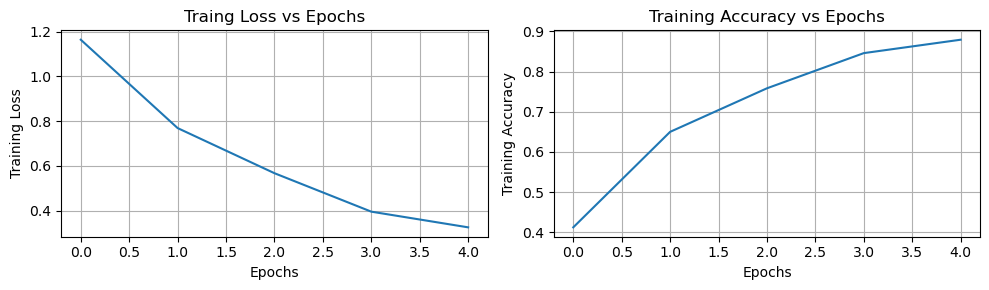

In [34]:
import matplotlib.pyplot as plt
 
def plot_training_metrics(losses, accuracies):
    """
        Plot the traning metrics
    """
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 3))

    axs[0].plot(losses)
    axs[0].set_title('Traing Loss vs Epochs')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Training Loss')
    axs[0].grid(True)

    axs[1].plot(accuracies)
    axs[1].set_title('Training Accuracy vs Epochs')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Training Accuracy')
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()


plot_training_metrics(losses, train_accuracy)

# * Step 5. Make predictions on the test data and compare them to the expected categories


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


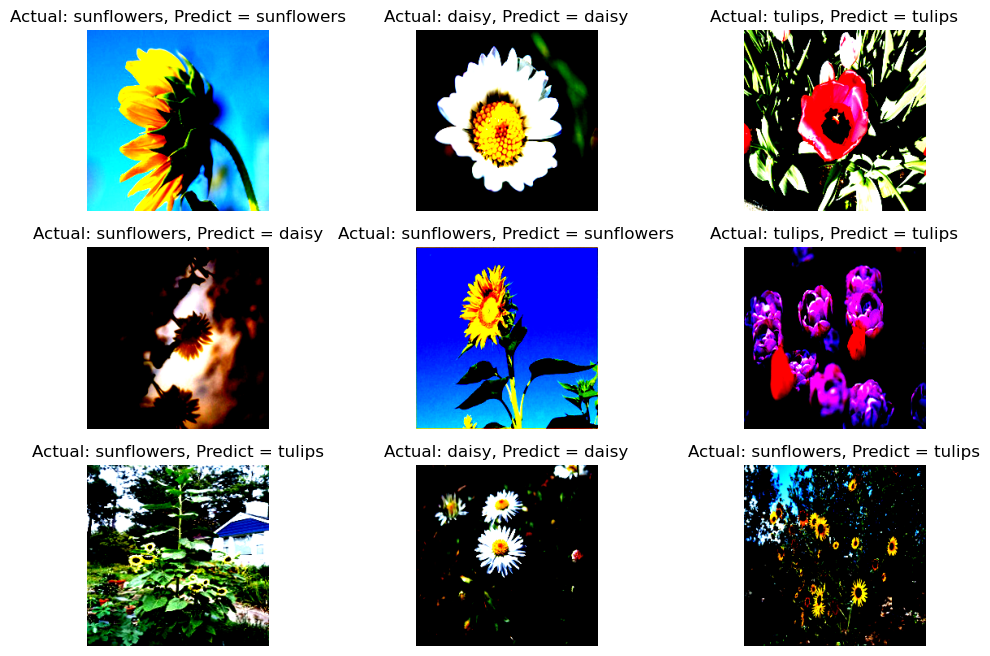

In [21]:
def show_images_with_predictions(model, data_loader, class_labels):
    model.eval()

    with torch.no_grad():
        for images, labels in data_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            
            plt.figure(figsize=(12, 8))
            for i in range(9):
                image = images[i].permute(1, 2, 0).numpy() 
                plt.subplot(3, 3, i + 1)
                plt.imshow(image)
                actual_label = class_labels[predicted[i]]
                plt.title(f"Actual: {class_names[labels[i].item()]}, Predict = {actual_label}")
                plt.axis("off")

            plt.show()
            break
                
            
show_images_with_predictions(model, val_dataloader, class_names)

In [35]:
# def evaluate(model, test_loader):
#     correct = 0
#     total = 0
#     with torch.no_grad(): 
#         for images, labels in test_loader:
#             outputs = model(images)
#             _, predicted = torch.max(outputs, 1)
#             total += labels.size(0)
#             correct += (predicted == labels).sum().item()

#     accuracy = correct / total
#     print('Accuracy on test set: {:.2f}%'.format(accuracy * 100))
#     return accuracy
    
test_accuracy = evaluate(model, val_dataloader)

Accuracy on test set: 78.33%


# * Step 6: Use GoogleNet(InceptionNet) and add a LinearLayer on top of it.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# Step 1: Define dataset paths
train_data_dir = "/tmp/hw3/dataset"
val_data_dir = "/tmp/hw3/dataset"

# Step 2: Define transforms
transform = transforms.Compose([
    transforms.Resize((299, 299)), 
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  
])

# Step 3: Load datasets
train_dataset = ImageFolder(root=train_data_dir, transform=transform)
val_dataset = ImageFolder(root=val_data_dir, transform=transform)

# Step 4: Define dataloaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Step 5: Load pre-trained InceptionNet (GoogleNet) model
inceptionnet = models.inception_v3(pretrained=True)

# Step 6: Modify the model
num_features = inceptionnet.fc.in_features
inceptionnet.fc = nn.Sequential(
    nn.Linear(num_features, 256),
    nn.ReLU(),
    nn.Linear(256, len(class_names))  
)

# Step 7: Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(inceptionnet.parameters(), lr=0.001)

# Step 8: Train the model
num_epochs = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
inceptionnet.to(device)

for epoch in range(num_epochs):
    inceptionnet.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs, _ = inceptionnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_dataset)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")


# * Step 7: Train the GoogleNet model and compare the accuracy with the first model.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


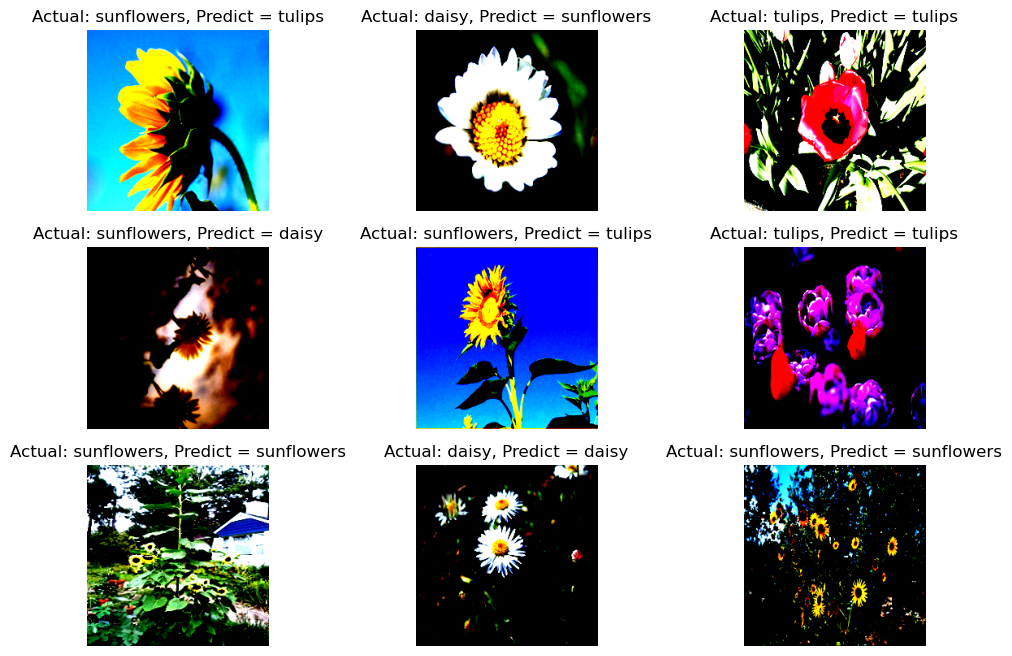

Accuracy on test set: 68.33%


In [29]:
show_images_with_predictions(inceptionnet, val_dataloader, class_names)
googleNet_accuracy =  evaluate(inceptionnet, val_dataloader)

### Comparision

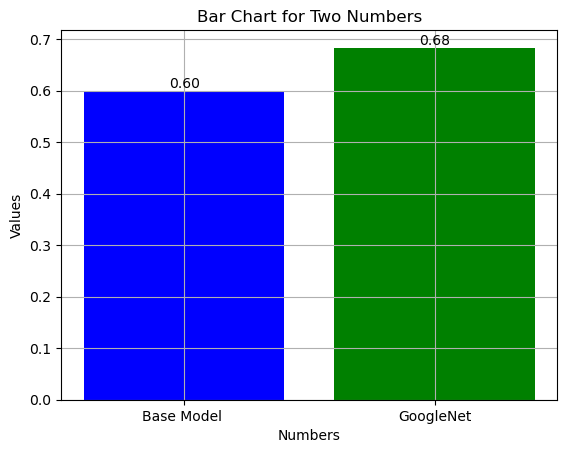

In [30]:
labels = ['Base Model ', 'GoogleNet']
values = [test_accuracy, googleNet_accuracy]

# Plotting the bar chart
bars = plt.bar(labels, values, color=['blue', 'green'])
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(f'{value:.2f}'),
             ha='center', va='bottom')
plt.title('Bar Chart for Two Numbers')
plt.xlabel('Numbers')
plt.ylabel('Values')
plt.grid(True)
plt.show()

# Working

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# Step 1: Define dataset paths
train_data_dir = "/tmp/hw3/dataset"
val_data_dir = "/tmp/hw3/dataset"

# Step 2: Define transforms
transform = transforms.Compose([
    transforms.Resize((299, 299)),  # GoogleNet (InceptionNet) input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Standard normalization for InceptionNet
])

# Step 3: Load datasets
train_dataset = ImageFolder(root=train_data_dir, transform=transform)
val_dataset = ImageFolder(root=val_data_dir, transform=transform)

# Step 4: Define dataloaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Step 5: Load pre-trained InceptionNet (GoogleNet) model
inceptionnet = models.inception_v3(pretrained=True)

# Step 6: Modify the model
num_features = inceptionnet.fc.in_features
inceptionnet.fc = nn.Sequential(
    nn.Linear(num_features, 256),
    nn.ReLU(),
    nn.Linear(256, len(train_dataset.classes))  
)

# Step 7: Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(inceptionnet.parameters(), lr=0.001)

# Step 8: Train the model
num_epochs = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
inceptionnet.to(device)

for epoch in range(num_epochs):
    inceptionnet.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs, _ = inceptionnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_dataset)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

# Step 9: Evaluate the model
inceptionnet.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = inceptionnet(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Accuracy on validation set: {100 * accuracy:.2f}%")


Epoch 1/5, Loss: 0.5891


KeyboardInterrupt: 

In [ ]:
# Step 9: Evaluate the model
inceptionnet.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in val_loader:
        outputs = inceptionnet(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Accuracy on validation set: {100 * accuracy:.2f}%")